# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr
import os
from datetime import date
from pprint import pprint
from scipy import misc
import matplotlib.pyplot as plt



try:
    import scipy.stats
except:
    import pip
    pip.main(["install","scipy.stats"])
    import scipy.stats




# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


#lists for data frames
name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#count
record = 0
count = 1


#printing data
print(f"Beginning Data Retrieval")
print(f"---------------------------------------------------")

#loop
for index, city in enumerate(cities, start = 1):
    response = requests.get(query_url + city).json()
    try:
            name.append(response["name"])
            lat.append(response["coord"]["lat"])
            lng.append(response["coord"]["lon"])
            max_temp.append(response["main"]["temp_max"])
            humidity.append(response["main"]["humidity"])
            cloudiness.append(response["clouds"]["all"])
            wind_speed.append(response["wind"]["speed"])
            country.append(response["sys"]["country"])
            date.append(response["dt"])
            city_name = response["name"]
           
            
            if record >49:
                record = 0
                count += 1
            else:
                record = record + 1
            
            
            print(f"Processing Record {record} of Set {count} | {city_name}")
            time.sleep(1)
    except: 
                print(f"City not found. Skipping...")
    continue
            
            
print("---------------------------------------------------------")
print("Data Retrival Complete")
print("---------------------------------------------------------")
                
            
        






Beginning Data Retrieval
---------------------------------------------------
Processing Record 1 of Set 1 | Puerto Ayora
Processing Record 2 of Set 1 | Upernavik
Processing Record 3 of Set 1 | Leiyang
City not found. Skipping...
City not found. Skipping...
Processing Record 4 of Set 1 | Ushuaia
Processing Record 5 of Set 1 | Bluff
Processing Record 6 of Set 1 | Arona
Processing Record 7 of Set 1 | Puerto Escondido
Processing Record 8 of Set 1 | Airai
City not found. Skipping...
Processing Record 9 of Set 1 | Saint-Philippe
Processing Record 10 of Set 1 | Iralaya
Processing Record 11 of Set 1 | Pandan
Processing Record 12 of Set 1 | East London
Processing Record 13 of Set 1 | Hobyo
Processing Record 14 of Set 1 | Mahébourg
Processing Record 15 of Set 1 | Nanortalik
City not found. Skipping...
Processing Record 16 of Set 1 | Saint Paul Harbor
Processing Record 17 of Set 1 | Albany
Processing Record 18 of Set 1 | Vytegra
City not found. Skipping...
Processing Record 19 of Set 1 | Hermanus

Processing Record 31 of Set 4 | Shelui
Processing Record 32 of Set 4 | São Miguel do Araguaia
Processing Record 33 of Set 4 | Santa Rosa
City not found. Skipping...
Processing Record 34 of Set 4 | Vestmannaeyjar
Processing Record 35 of Set 4 | La Providencia
Processing Record 36 of Set 4 | Kremenchuk
Processing Record 37 of Set 4 | Alibag
Processing Record 38 of Set 4 | Novo Cruzeiro
Processing Record 39 of Set 4 | Moscow
Processing Record 40 of Set 4 | Pareora
Processing Record 41 of Set 4 | Clyde River
Processing Record 42 of Set 4 | Mananjary
Processing Record 43 of Set 4 | Fortuna
Processing Record 44 of Set 4 | Koronowo
Processing Record 45 of Set 4 | Castro
Processing Record 46 of Set 4 | Tiksi
Processing Record 47 of Set 4 | Bāfq
Processing Record 48 of Set 4 | At-Bashi
Processing Record 49 of Set 4 | Baruun-Urt
Processing Record 50 of Set 4 | Klyuchi
Processing Record 0 of Set 5 | Agde
City not found. Skipping...
City not found. Skipping...
Processing Record 1 of Set 5 | Gaines

Processing Record 12 of Set 8 | Ubari
Processing Record 13 of Set 8 | Saint-Pierre
Processing Record 14 of Set 8 | Faya
Processing Record 15 of Set 8 | Saldanha
Processing Record 16 of Set 8 | Stroud
Processing Record 17 of Set 8 | Mokrousovo
Processing Record 18 of Set 8 | Denpasar
Processing Record 19 of Set 8 | Douglas
Processing Record 20 of Set 8 | Makakilo City
Processing Record 21 of Set 8 | Vrangel'
Processing Record 22 of Set 8 | Preobrazheniye
Processing Record 23 of Set 8 | Forsytheganj
Processing Record 24 of Set 8 | Myaundzha
Processing Record 25 of Set 8 | Formosa
Processing Record 26 of Set 8 | Kabare
Processing Record 27 of Set 8 | Kalianget
City not found. Skipping...
Processing Record 28 of Set 8 | Nālūt
Processing Record 29 of Set 8 | Evensk
Processing Record 30 of Set 8 | Aden
Processing Record 31 of Set 8 | Kirakira
Processing Record 32 of Set 8 | Sahuaripa
Processing Record 33 of Set 8 | Dukat
Processing Record 34 of Set 8 | Sarlat-la-Canéda
Processing Record 35 o

Processing Record 45 of Set 11 | Zhezkazgan
Processing Record 46 of Set 11 | Fereydūnkenār
Processing Record 47 of Set 11 | Livingstonia
Processing Record 48 of Set 11 | Corner Brook
Processing Record 49 of Set 11 | San Quintín
Processing Record 50 of Set 11 | Butembo
Processing Record 0 of Set 12 | Makueni Boma
Processing Record 1 of Set 12 | São José da Coroa Grande
Processing Record 2 of Set 12 | Poconé
Processing Record 3 of Set 12 | Petropavlovsk-Kamchatskiy
City not found. Skipping...
Processing Record 4 of Set 12 | Tilichiki
Processing Record 5 of Set 12 | Mariental
Processing Record 6 of Set 12 | Yagodnoye
Processing Record 7 of Set 12 | Guisijan
Processing Record 8 of Set 12 | Chernoistochinsk
Processing Record 9 of Set 12 | Venice of the Philippines
Processing Record 10 of Set 12 | Bāneh
Processing Record 11 of Set 12 | Balabac
Processing Record 12 of Set 12 | Ostrovnoy
Processing Record 13 of Set 12 | Macamic
Processing Record 14 of Set 12 | Bukama
Processing Record 15 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_df = pd.DataFrame({"City": name,
                          "Latitude": lat,
                          "Longitude": lng,
                          "Max Temperature": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed": wind_speed,
                          "Country":country,
                          "Date": date})
weather_df.to_csv(output_data_file)
weather_df.head()


,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,73.99,92,25,3.00,EC,1610251685
1,Upernavik,72.7868,-56.1549,10.47,83,96,8.99,GL,1610251854
2,Leiyang,26.4024,112.8591,43.83,55,99,5.53,CN,1610252034
3,Ushuaia,-54.8000,-68.3000,44.60,87,20,16.11,AR,1610251823
4,Bluff,-46.6000,168.3333,64.00,70,93,23.00,NZ,1610251874


In [10]:
weather_df.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,5.890000e+02
mean,21.952199,21.243768,46.776367,74.268251,55.843803,7.853922,1.610253e+09
std,33.001854,90.477999,32.130853,19.163352,39.418038,5.773288,2.476146e+02
min,-54.800000,-179.166700,-32.330000,1.000000,0.000000,0.130000,1.610251e+09
25%,-4.882800,-58.178100,24.800000,65.000000,14.000000,3.440000,1.610252e+09
50%,28.099600,25.366700,54.210000,79.000000,75.000000,6.620000,1.610253e+09
75%,49.141400,102.265500,75.160000,88.000000,93.000000,10.580000,1.610253e+09
max,78.218600,178.416700,102.200000,100.000000,100.000000,37.310000,1.610253e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
humidity_df = weather_df.loc[weather_df["Humidity"] > 100]
humidity_df

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

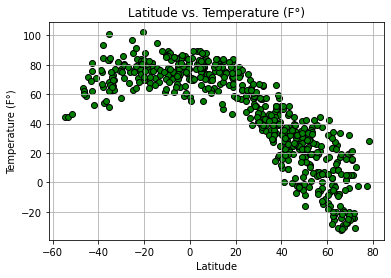

 Cities near the equator have a higher max temperature as opposed to cities far away from the equator. This suggests that the average temperature of the world is higher near the equator, where the sun affects the earth the most.


<Figure size 432x288 with 0 Axes>

In [23]:
x_values = weather_df["Latitude"]
y_values = weather_df["Max Temperature"]
plt.scatter(x_values, y_values, marker="o", edgecolors="black", color="green")
plt.grid(b=True, which="major", linestyle="-")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F°)")
plt.title(f"Latitude vs. Temperature (F°)")


plt.show()




plt.savefig("latvstemp.png", format='png')


print(f" Cities near the equator have a higher max temperature as opposed to cities far away from the equator. This suggests that the average temperature of the world is higher near the equator, where the sun affects the earth the most.")

## Latitude vs. Humidity Plot

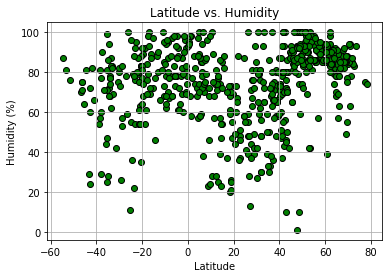

<Figure size 432x288 with 0 Axes>

In [26]:
x_values = weather_df["Latitude"]
y_values = weather_df["Humidity"]
plt.scatter(x_values, y_values, marker="o", edgecolors="black",color = "green")
plt.grid(b=True, which="major", linestyle="-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude vs. Humidity")
plt.show()
         
plt.savefig("Latitude vs Humidity.png", format='png')         
         
print(f"Cities near the coast are usually the most humid and there are coastal cities all along the Latitude of earth which is why this plot shows no correlation between Latitude and Humidity."" ")

## Latitude vs. Cloudiness Plot

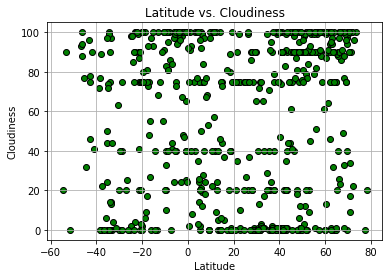

This shows cloudiness of a city and it's latitude have no correlation between each other.


<Figure size 432x288 with 0 Axes>

In [27]:
x_values = weather_df["Latitude"]
y_values = weather_df["Cloudiness"]
plt.scatter(x_values, y_values, marker="o", edgecolors="black",color = "green")
plt.grid(b=True, which="major", linestyle="-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Latitude vs. Cloudiness")
plt.show()
         
plt.savefig("Latitude vs Cloudiness.png", format='png')         
         
print(f"This shows cloudiness of a city and its latitude have no correlation between each other.")

## Latitude vs. Wind Speed Plot

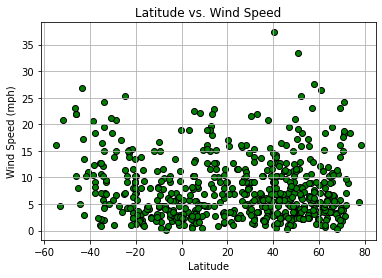

Wind speed of a city has no correlation with its Latitude.


<Figure size 432x288 with 0 Axes>

In [28]:
x_values = weather_df["Latitude"]
y_values = weather_df["Wind Speed"]
plt.scatter(x_values, y_values, marker="o", edgecolors="black",color = "green")
plt.grid(b=True, which="major", linestyle="-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Latitude vs. Wind Speed")
plt.show()
         
plt.savefig("Latitude vs Wind Speed.png", format='png')         
         
print(f"Wind speed of a city has no correlation with its Latitude.")

## Linear Regression

In [57]:
northern_df = weather_df.loc[weather_df["Latitude"] >= 0]
southern_df = weather_df.loc[weather_df["Latitude"] < 0]

northern_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
1,Upernavik,72.7868,-56.1549,10.47,83,96,8.99,GL,1610251854
2,Leiyang,26.4024,112.8591,43.83,55,99,5.53,CN,1610252034
5,Arona,28.0996,-16.6810,57.20,67,20,6.91,ES,1610252118
6,Puerto Escondido,15.8500,-97.0667,75.16,82,37,0.78,MX,1610252119
9,Iralaya,15.0000,-83.2333,76.06,85,44,12.75,HN,1610252169


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [60]:
x = northern_df["Latitude"]
y = northern_df["Max Temperature"]
correlation = st.pearsonr(x,y)[0]
print(f" The r-value is: {correlation}")

slope, intercept, r, p, std = linregress(x,y)
regression = slope * x + intercept
line = "y = " + str(round(slope, 2))+"x +" + str(round(intercept,2))


plt.scatter(x,y, marker="o")
plt.plot(x_values,regression,"r-")
plt.annotate(line,(6,10),fontsize=14,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F°)")
plt.title("Northern Hemisphere Temperature vs. Latitude Linear Regression")


plt.show()
 #######???????????????????????????????????????????           

NameError: name 'st' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


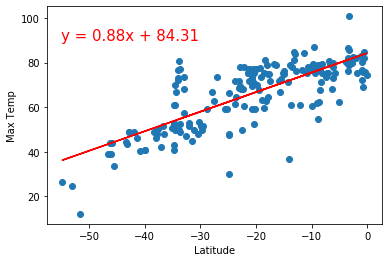

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


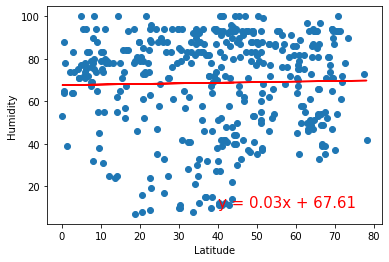

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


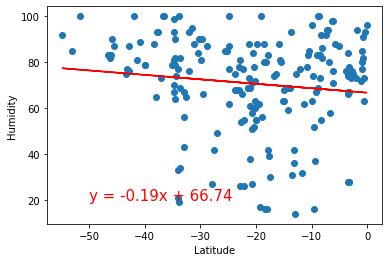

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


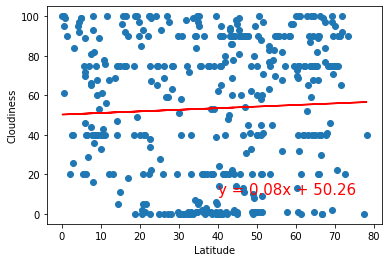

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


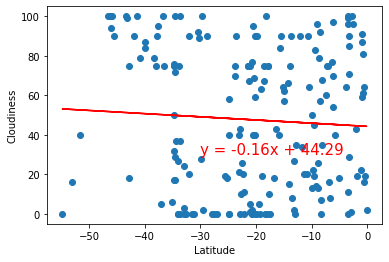

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


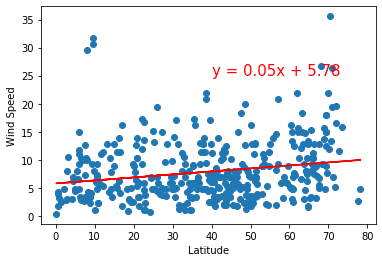

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


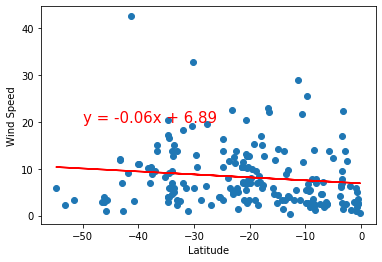

In [32]:
x